In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
# Load dataset
df = pd.read_csv(
    "C:/Users/njann/Desktop/master/SD6101 - Data Science Thinking/Project/S1Data.csv"
)
X = df.drop(["TIME", "Event"], axis=1)
y = df["Event"]

print(X)


     Gender  Smoking  Diabetes  BP  Anaemia   Age  Ejection.Fraction  Sodium  \
0         0        0         0   0        1  43.0                 50     135   
1         1        1         1   0        1  73.0                 30     142   
2         1        1         0   1        0  70.0                 20     134   
3         1        0         0   0        1  65.0                 25     141   
4         1        0         0   0        0  64.0                 60     137   
..      ...      ...       ...  ..      ...   ...                ...     ...   
294       0        0         1   0        0  45.0                 55     132   
295       0        0         1   0        0  51.0                 40     134   
296       1        0         0   0        0  45.0                 14     127   
297       1        0         1   0        0  60.0                 45     133   
298       0        0         0   1        1  65.0                 25     137   

     Creatinine  Pletelets   CPK  
0   

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Placeholder for storing results across 100 repetitions and the feature importance
results = {
    "AdaBoost": {"accuracy": [], "f1_score": [], "roc_auc": [], "mcc": []},
    "GradientBoost": {"accuracy": [], "f1_score": [], "roc_auc": [], "mcc": []},
    "XGBoost": {"accuracy": [], "f1_score": [], "roc_auc": [], "mcc": []},
}

# Placeholder for accumulating feature rankings
feature_ranks = np.zeros(X.shape[1])


In [12]:
# Repeat the experiment with 100 times
for i in range(100):
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42 + i
    )

    # Initialize models with consistent random state
    ada_model = AdaBoostClassifier(random_state=42)
    grad_model = GradientBoostingClassifier(random_state=42)
    xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)

    # Train each model and make predictions
    for model_name, model in zip(
        ["AdaBoost", "GradientBoost", "XGBoost"], [ada_model, grad_model, xgb_model]
    ):
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.5).astype(int)

        # metrics
        results[model_name]["accuracy"].append(accuracy_score(y_test, y_pred))
        results[model_name]["f1_score"].append(f1_score(y_test, y_pred))
        results[model_name]["roc_auc"].append(roc_auc_score(y_test, y_prob))
        results[model_name]["mcc"].append(matthews_corrcoef(y_test, y_pred))

    # Get feature importances and compute rankings (higher importance gets a lower rank)
    importances = grad_model.feature_importances_
    rankings = np.argsort(importances)[::-1]  # Rank features from most to least important
    for rank, index in enumerate(rankings):
        feature_ranks[index] += rank + 1  # Adding 1 to make ranking start from 1 instead of 0

# Average the feature rankings over 100 runs
average_ranks = feature_ranks / 100

# Calculate average metrics for each model and display them in a DataFrame
average = {
    model: {metric: np.mean(values) for metric, values in metrics.items()}
    for model, metrics in results.items()
}
print("Average Metrics over 100 Repetitions:", average)
metrics = pd.DataFrame(
    {
        "Model": ["AdaBoost", "GradientBoost", "XGBoost"],
        "Accuracy": [
            average["AdaBoost"]["accuracy"],
            average["GradientBoost"]["accuracy"],
            average["XGBoost"]["accuracy"],
        ],
        "F1 Score": [
            average["AdaBoost"]["f1_score"],
            average["GradientBoost"]["f1_score"],
            average["XGBoost"]["f1_score"],
        ],
        "ROC AUC": [
            average["AdaBoost"]["roc_auc"],
            average["GradientBoost"]["roc_auc"],
            average["XGBoost"]["roc_auc"],
        ],
        "MCC": [
            average["AdaBoost"]["mcc"],
            average["GradientBoost"]["mcc"],
            average["XGBoost"]["mcc"],
        ],
    }
)
print(metrics)



C:\Users\njann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\njann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\njann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

Average Metrics over 100 Repetitions: {'AdaBoost': {'accuracy': np.float64(0.7142222222222223), 'f1_score': np.float64(0.5188905238546853), 'roc_auc': np.float64(0.7058887085604617), 'mcc': np.float64(0.3240318869302973)}, 'GradientBoost': {'accuracy': np.float64(0.7297777777777777), 'f1_score': np.float64(0.5408450299106622), 'roc_auc': np.float64(0.7500076088956622), 'mcc': np.float64(0.3594772402182449)}, 'XGBoost': {'accuracy': np.float64(0.7252222222222222), 'f1_score': np.float64(0.5413453493535545), 'roc_auc': np.float64(0.7361515753577329), 'mcc': np.float64(0.35497333296635125)}}
           Model  Accuracy  F1 Score   ROC AUC       MCC
0       AdaBoost  0.714222  0.518891  0.705889  0.324032
1  GradientBoost  0.729778  0.540845  0.750008  0.359477
2        XGBoost  0.725222  0.541345  0.736152  0.354973


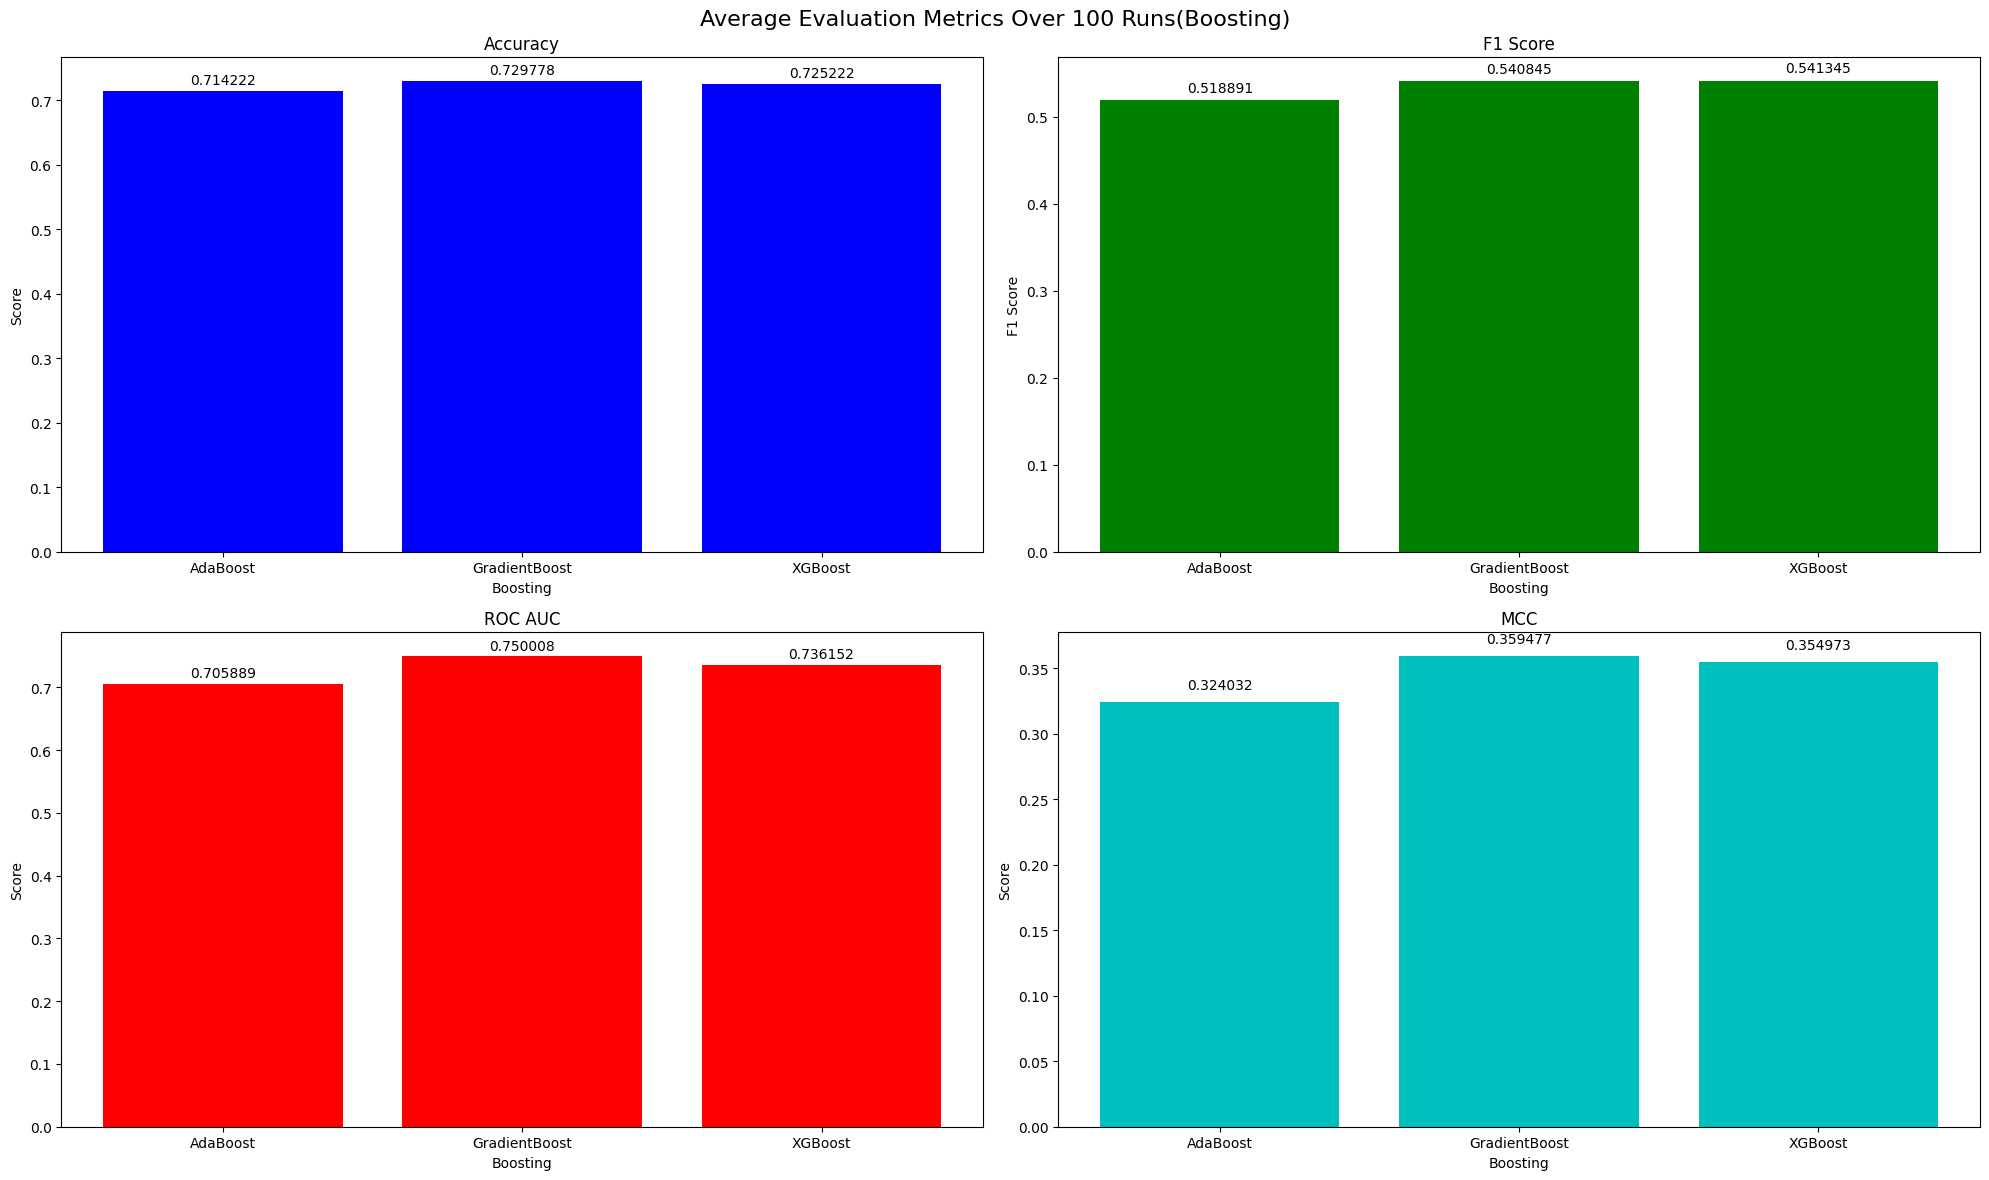

In [21]:
# Plotting the bar chart for comparison of metrics
fig, axes = plt.subplots(2, 2, figsize=(20,12))
fig.suptitle('Average Evaluation Metrics Over 100 Runs(Boosting)', fontsize=16)
# Accuracy
axes[0, 0].bar(metrics["Model"], metrics["Accuracy"], color = 'b')
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_xlabel('Boosting')
axes[0, 0].set_ylabel("Score")
for i, v in enumerate(metrics["Accuracy"]):
    axes[0, 0].text(i, v + 0.01, f"{v:.6f}", ha="center")

# F1 Score
axes[0, 1].bar(metrics["Model"], metrics["F1 Score"],color = 'g')
axes[0, 1].set_title("F1 Score")
axes[0, 1].set_xlabel('Boosting')
axes[0, 1].set_ylabel("F1 Score")
for i, v in enumerate(metrics["F1 Score"]):
    axes[0, 1].text(i, v + 0.01, f"{v:.6f}", ha="center")

# ROC AUC
axes[1, 0].bar(metrics["Model"], metrics["ROC AUC"], color = 'r')
axes[1, 0].set_title("ROC AUC")
axes[1, 0].set_xlabel('Boosting')
axes[1, 0].set_ylabel("Score")
for i, v in enumerate(metrics["ROC AUC"]):
    axes[1, 0].text(i, v + 0.01, f"{v:.6f}", ha="center")

# MCC
axes[1, 1].bar(metrics["Model"], metrics["MCC"], color = 'c')
axes[1, 1].set_title("MCC")
axes[1, 1].set_xlabel('Boosting')
axes[1, 1].set_ylabel("Score")
for i, v in enumerate(metrics["MCC"]):
    axes[1, 1].text(i, v + 0.01, f"{v:.6f}", ha="center")

plt.tight_layout()
plt.show()


              Feature  Average Rank
0          Creatinine          1.30
1   Ejection.Fraction          2.07
2                 CPK          3.66
3                 Age          3.66
4           Pletelets          4.57
5              Sodium          5.74
6                  BP          8.24
7              Gender          8.56
8             Anaemia          9.03
9             Smoking          9.57
10           Diabetes          9.60


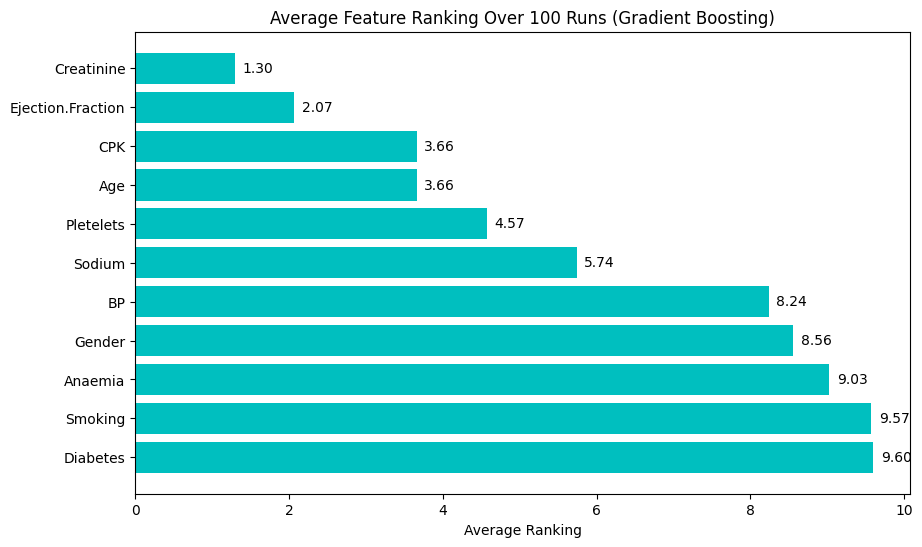

In [20]:
# Create a DataFrame to hold feature names and their average ranks
average_ranking = pd.DataFrame({
    "Feature": X.columns,
    "Average Rank": average_ranks
})

# Sort the DataFrame by average rank (lower average rank = higher importance)
average_ranking = average_ranking.sort_values(by="Average Rank").reset_index(drop=True)
print(average_ranking)
# Plotting the average feature ranking
plt.figure(figsize=(10, 6))
bars = plt.barh(average_ranking["Feature"], average_ranking["Average Rank"], color = 'c', align='center')
plt.xlabel('Average Ranking')
plt.title('Average Feature Ranking Over 100 Runs (Gradient Boosting)')
plt.gca().invert_yaxis()

# Add text labels to each bar
for bar, rank in zip(bars, average_ranking["Average Rank"]):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"{rank:.2f}", va='center')

plt.show()

